In [ ]:
%matplotlib inline

from knn_materials import *

# Introduction

Out of all the machine learning algorithms I have come across, KNN has easily been the simplest to pick up. Despite it’s simplicity, it has proven to be incredibly effective at certain tasks (as you will see in this article).

And even better? It can be used for both classification and regression problems! It’s far more popularly used for classification problems, however. I have seldom seen KNN being implemented on any regression task. <strong>My aim here is to illustrate and emphasize how KNN can be equally effective when the target variable is continuous in nature.</strong>

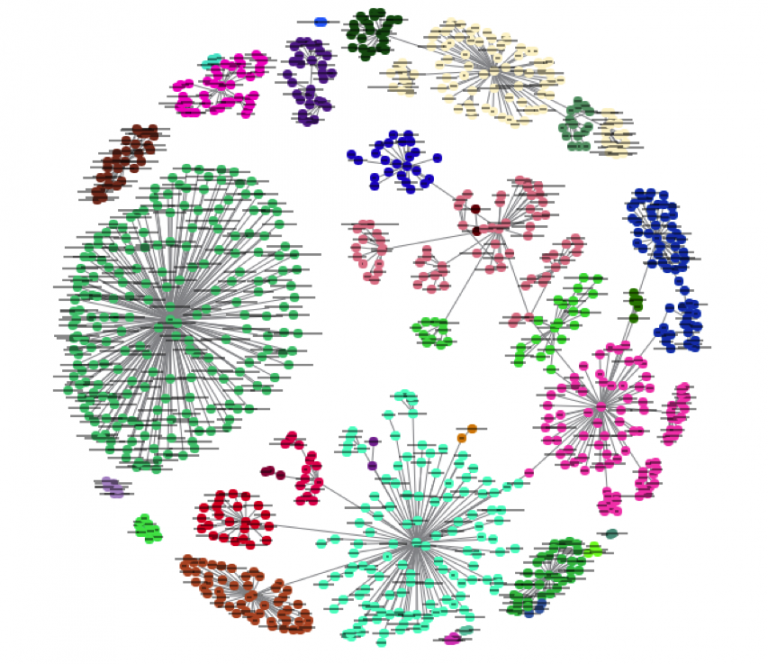

In this notebook, we will first understand the intuition behind KNN algorithms, look at the different ways to calculate distances between points, and then finally run the algorithm in Python on the Boston Housing Prices toy dataset. Let’s go!

# Table of contents

<ol>
    <li> A Simple Example to Understand the Intuition Behind KNN </li>
    <li> How does the KNN Algorithm Work? </li>
    <li> Methods of Calculating Distance Between Points </li>
    <li> How to Choose the k Factor? </li>
    <li> Working on a Dataset </li>
    <li> Additional Resources </li>
</ol>

# 1. A Simple Example to Understand the Intuition Behind KNN

Let us start with a simple example. Consider the following table – it consists of the height, age and weight (target) value for 10 people. As you can see, the weight value of ID11 is missing. We need to predict the weight of this person based on their height and age.

<i>Note: The data in this table does not represent actual values. It is merely used as an example to explain this concept.</i>

In [ ]:
example_data

For a clearer understanding of this, below is the plot of height versus age from the above table:

In [ ]:
example_plot()

In the above graph, the y-axis represents the height of a person (in feet) and the x-axis represents the age (in years). The points are numbered according to the ID values. The yellow point (ID 10) is our test point.

If I ask you to identify the weight of ID10 based on the plot, what would be your answer? You would likely say that since ID10 is <b>closer</b> to points 4 and 0, so it must have a weight similar to these IDs, probably between 72-77 kgs (weights of ID0 and ID4 from the table). That actually makes sense, but how do you think the algorithm predicts the values? We will find that out in this article.

# 2. How does the KNN Algorithm Work?

As we saw above, KNN can be used for both classification and regression problems. The algorithm uses ‘<b>feature similarity</b>’ to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID10 has height and age similar to ID0 and ID4, so the weight would also approximately be the same.

Had it been a classification problem, we would have taken the mode as the final prediction. In this case, we have two values of weight – 72 and 77. Any guesses how the final value will be calculated? The average of the values is taken to be the final prediction.

Below is a stepwise explanation of the algorithm:

$1.$ First, the distance between the new point and each training point is calculated.</li>

In [ ]:
example_plot(arrows=True)

$2.$ The closest k data points are selected (based on the distance). In this example, points 0, 4, 5 will be selected if value of k is 3. We will further explore the method to select the right value of k later in this article.

In [ ]:
example_plot(arrows=True, radius=True)

$3.$ The average of these data points is the final prediction for the new point. Here, we have weight of ID10 = (77+72+60)/3 = 69.66 kg.

In the next few sections we will discuss each of these three steps in detail.

# 3. Methods of Calculating Distance Between Points

The <b>first step</b> is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

### Euclidean Distance
Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).
$$\sqrt{\sum_{i=1}^k (x_i-y_i)^2}$$

### Manhattan Distance
This is the distance between real vectors using the sum of their absolute difference.

$$\sum_{i=1}^k\left|x_i-y_i\right|$$

### Hamming Distance
It is used for categorical variables. If the value (x) and the value (y) are same, the distance D will be equal to 0 . Otherwise D=1.

$$D_H=\sum_{i=1}^k\left|x_i-y_i\right|$$
$$x=y \implies D=0$$
$$x \ne y \implies D=1$$

Once the distance of a new observation from the points in our training set has been measured, the next step is to pick the closest points. The number of points to be considered is defined by the value of k.

# 4. How to Choose the k Factor?

The <b>second step</b> is to select the k value. This determines the number of neighbors we look at when we assign a value to any new observation.

In our example, for a value k = 3, the closest points are ID0, ID4 and ID5.

In [ ]:
example_plot(arrows=True, radius=True)

In [ ]:
neighbors = example_data[example_data.index.isin([0, 4, 5])]
neighbors

The prediction of weight for ID10 will be:

In [ ]:
id10 = neighbors['weight'].mean()
id10

For the value of k=5, the closest points will be ID0, ID3, ID4, ID5, ID9.

In [ ]:
example_plot(arrows=True, radius=True, r_scale=9)

In [ ]:
neighbors = example_data[example_data.index.isin([0, 3, 4, 5, 9])]
neighbors

In [ ]:
id10 = neighbors['weight'].mean()
id10

We notice that based on the k value, the final result tends to change. Then how can we figure out the optimum value of k? Let us decide it based on the error calculation for our train and validation set (after all, minimizing the error is our final goal!).

Have a look at the below graphs for training error and validation error for different values of k.

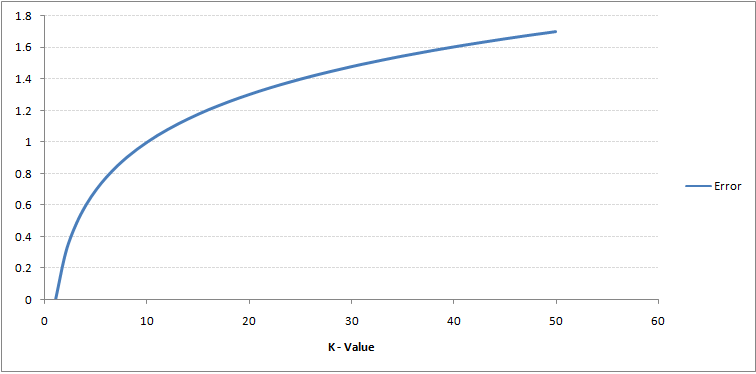
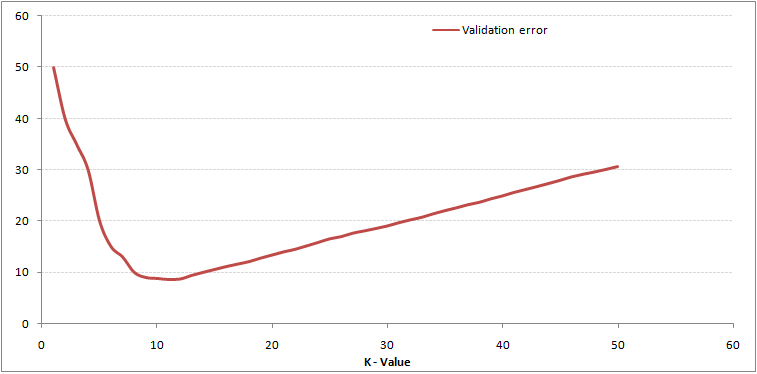

In this case, a very low value of k (suppose k=1) causes the model to overfit on the training data, which leads to a high error rate on the validation set. On the other hand, for a high value of k, the model performs poorly on both train and validation set. If you observe closely, the validation error curve reaches a minima at a value of k = 9. This value of k is the optimum value of the model (it will vary for different datasets). This curve is known as an ‘<b>elbow curve</b>‘ (because it has a shape like an elbow) and is usually used to determine the k value.

You can also use the grid search technique to find the best k value. We will utilize this in the next section.

# 5. Work on a Dataset

By now you have a clear understanding of the algorithm. We will now go ahead and implement the algorithm on a dataset.

### 1. Read the file

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['TARGET'] = pd.Series(dataset.target)
df.head()

### 2. Preprocessing - Scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=list(dataset['feature_names']) + ['TARGET'])
df.head()

### 3. Create data subsets

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(df, test_size=0.2)

x_train = train.drop('TARGET', axis=1)
y_train = train['TARGET']

x_val = val.drop('TARGET', axis=1)
y_val = val['TARGET']

x_test = test.drop('TARGET', axis=1)
y_test = test['TARGET']

### 4. Look at various k values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
rmse_val = []

for k in range(20):
    model = neighbors.KNeighborsRegressor(n_neighbors=k+1)
    model.fit(x_train, y_train)
    pred=model.predict(x_val)
    error = np.sqrt(mean_squared_error(y_val, pred))
    rmse_val.append(error)
    print('RMSE value for k={} is: {}'.format(k+1, error))

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

### 7. Predictions on the test dataset

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors=1)
model.fit(x_train, y_train)

model.score(x_test, y_test)

### 8. GridsearchCV

For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. <b>You can simply use gridsearch to find the best value.</b>

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

# Reference

Adapted from https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/